# Chapter 14: Factorial Designs and ANOVA

*Mathematics for Psychologists and Computation*

Welcome to Chapter 14! In this chapter, we'll explore factorial designs and Analysis of Variance (ANOVA), powerful tools that allow psychologists to examine the effects of multiple independent variables simultaneously. These techniques are essential for understanding complex behavioral phenomena where multiple factors might influence outcomes.

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

# Set seed for reproducibility
np.random.seed(42)

## 1. Introduction to Factorial Designs

In psychological research, we often want to investigate how multiple factors affect an outcome. For example, we might wonder:

- How do both caffeine consumption **and** sleep duration affect reaction time?
- How do both teaching method **and** study duration affect test scores?
- How do both medication type **and** therapy type affect depression symptoms?

A factorial design allows us to examine:
1. The main effect of each factor (independent variable)
2. Interactions between factors (when the effect of one factor depends on the level of another)

The simplest factorial design is a **2×2 factorial design** with two factors, each with two levels:

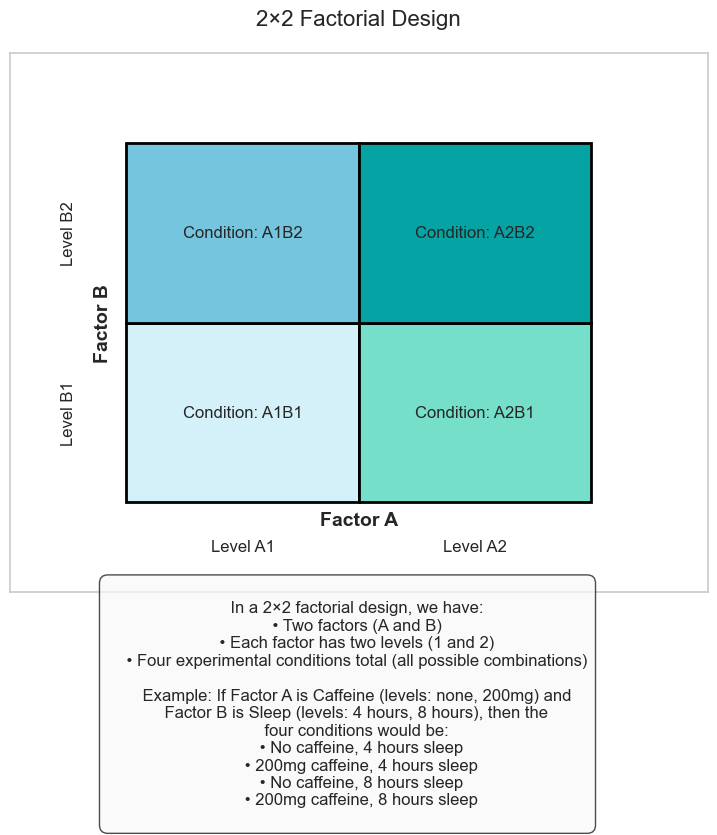

In [3]:
# Create a visualization of a 2×2 factorial design
def visualize_2x2_design():
    # Create a 2×2 grid
    fig, ax = plt.subplots(figsize=(9, 7))
    
    # Remove axes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Create a grid
    rect1 = plt.Rectangle((0, 0), 2, 2, facecolor='#D4F1F9', edgecolor='black', linewidth=2)
    rect2 = plt.Rectangle((2, 0), 2, 2, facecolor='#75DFCA', edgecolor='black', linewidth=2)
    rect3 = plt.Rectangle((0, 2), 2, 2, facecolor='#75C5DF', edgecolor='black', linewidth=2)
    rect4 = plt.Rectangle((2, 2), 2, 2, facecolor='#05A3A4', edgecolor='black', linewidth=2)
    
    # Add rectangles to plot
    for rect in [rect1, rect2, rect3, rect4]:
        ax.add_patch(rect)
    
    # Add labels for Factor A
    ax.text(2, -0.2, 'Factor A', ha='center', va='center', fontsize=14, fontweight='bold')
    ax.text(1, -0.5, 'Level A1', ha='center', va='center', fontsize=12)
    ax.text(3, -0.5, 'Level A2', ha='center', va='center', fontsize=12)
    
    # Add labels for Factor B
    ax.text(-0.2, 2, 'Factor B', ha='center', va='center', fontsize=14, fontweight='bold', rotation=90)
    ax.text(-0.5, 1, 'Level B1', ha='center', va='center', fontsize=12, rotation=90)
    ax.text(-0.5, 3, 'Level B2', ha='center', va='center', fontsize=12, rotation=90)
    
    # Add condition labels in each cell
    ax.text(1, 1, 'Condition: A1B1', ha='center', va='center', fontsize=12)
    ax.text(3, 1, 'Condition: A2B1', ha='center', va='center', fontsize=12)
    ax.text(1, 3, 'Condition: A1B2', ha='center', va='center', fontsize=12)
    ax.text(3, 3, 'Condition: A2B2', ha='center', va='center', fontsize=12)
    
    # Set plot limits
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 5)
    
    # Set title
    ax.set_title('2×2 Factorial Design', fontsize=16, pad=20)
    
    # Add annotation explaining the design
    explanation = """
    In a 2×2 factorial design, we have:
    • Two factors (A and B)
    • Each factor has two levels (1 and 2)
    • Four experimental conditions total (all possible combinations)
    
    Example: If Factor A is Caffeine (levels: none, 200mg) and
    Factor B is Sleep (levels: 4 hours, 8 hours), then the
    four conditions would be:
      • No caffeine, 4 hours sleep
      • 200mg caffeine, 4 hours sleep
      • No caffeine, 8 hours sleep
      • 200mg caffeine, 8 hours sleep
    """
    
    plt.figtext(0.5, -0.05, explanation, ha='center', va='center', fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.5", facecolor='#f8f9fa', edgecolor='black', alpha=0.7))
    
    plt.show()

# Display the 2×2 factorial design visualization
visualize_2x2_design()

## 2. Creating a Simulated Experiment

Let's simulate a psychology experiment using a 2×2 factorial design. Our experiment will investigate:

- **Factor A: Caffeine** (Levels: No caffeine, 200mg caffeine)
- **Factor B: Sleep** (Levels: 4 hours, 8 hours)
- **Dependent Variable: Reaction time** (in milliseconds, lower is better)

We'll simulate data for 10 participants per condition (40 total participants):

In [4]:
# Function to generate simulated data for our 2×2 factorial experiment
def generate_factorial_data(n_per_cell=10):
    # Set the parameters for our simulated data
    # Base reaction time (in milliseconds)
    base_rt = 300  
    
    # Effect sizes
    caffeine_effect = -30  # Caffeine reduces reaction time by 30ms
    sleep_effect = -50     # 8 hours of sleep reduces reaction time by 50ms compared to 4 hours
    interaction_effect = 15  # The effect of caffeine is smaller when well-rested
    
    # Standard deviation (individual differences)
    rt_sd = 25
    
    # Create empty lists to store our data
    data = []
    
    # Generate data for each condition
    for caffeine in ["No Caffeine", "200mg Caffeine"]:
        for sleep in ["4 Hours", "8 Hours"]:
            # Determine condition effects
            condition_rt = base_rt
            
            # Add caffeine effect
            if caffeine == "200mg Caffeine":
                condition_rt += caffeine_effect
                
            # Add sleep effect
            if sleep == "8 Hours":
                condition_rt += sleep_effect
                
            # Add interaction effect if applicable
            if caffeine == "200mg Caffeine" and sleep == "8 Hours":
                condition_rt += interaction_effect
            
            # Generate data for n participants in this condition
            for participant in range(1, n_per_cell + 1):
                # Add some random individual variation
                rt = condition_rt + np.random.normal(0, rt_sd)
                
                # Add to our data
                data.append({
                    "Participant": f"P{participant}_{caffeine[:1]}_{sleep[:1]}",  # Create a unique ID
                    "Caffeine": caffeine,
                    "Sleep": sleep,
                    "ReactionTime": rt
                })
    
    # Create a DataFrame
    df = pd.DataFrame(data)
    
    return df

# Generate our simulated data
factorial_data = generate_factorial_data(n_per_cell=10)

# Display the first few rows
print("Sample of our experimental data:")
factorial_data.head(10)

Sample of our experimental data:


Participant     Caffeine    Sleep  ReactionTime
0      P1_N_4  No Caffeine  4 Hours    312.417854
1      P2_N_4  No Caffeine  4 Hours    296.543392
2      P3_N_4  No Caffeine  4 Hours    316.192213
3      P4_N_4  No Caffeine  4 Hours    338.075746
4      P5_N_4  No Caffeine  4 Hours    294.146166
5      P6_N_4  No Caffeine  4 Hours    294.146576
6      P7_N_4  No Caffeine  4 Hours    339.480320
7      P8_N_4  No Caffeine  4 Hours    319.185868
8      P9_N_4  No Caffeine  4 Hours    288.263140
9     P10_N_4  No Caffeine  4 Hours    313.564001

## 3. Visualizing Factorial Data

Before conducting formal analyses, it's always a good idea to visualize the data. This helps us understand patterns and potential interactions visually.

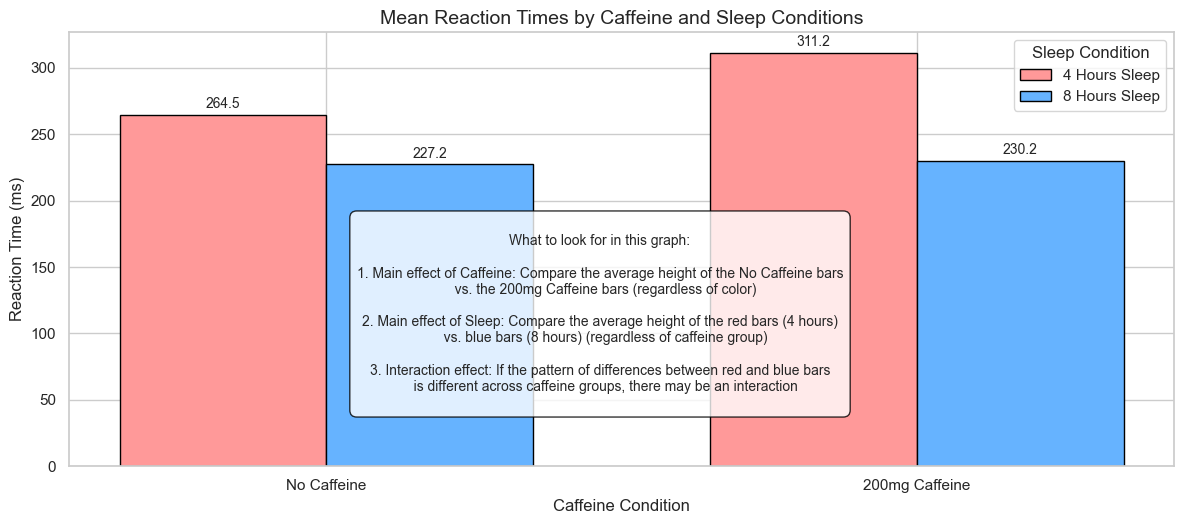

In [5]:
# Calculate means for each condition
condition_means = factorial_data.groupby(['Caffeine', 'Sleep'])['ReactionTime'].mean().reset_index()

# Reshape the data for plotting an interaction plot
condition_means_wide = condition_means.pivot(index='Caffeine', columns='Sleep', values='ReactionTime')

# Create a bar plot
plt.figure(figsize=(12, 6))

# Create positions for the bars
bar_width = 0.35
r1 = np.arange(2)  # Positions for the first group
r2 = [x + bar_width for x in r1]  # Positions for the second group

# Create the bars
sleep_4h = condition_means[condition_means['Sleep'] == '4 Hours']['ReactionTime'].values
sleep_8h = condition_means[condition_means['Sleep'] == '8 Hours']['ReactionTime'].values

plt.bar(r1, sleep_4h, width=bar_width, label='4 Hours Sleep', color='#ff9999', edgecolor='black')
plt.bar(r2, sleep_8h, width=bar_width, label='8 Hours Sleep', color='#66b3ff', edgecolor='black')

# Add value labels on bars
for i in range(len(r1)):
    plt.text(r1[i], sleep_4h[i] + 5, f"{sleep_4h[i]:.1f}", ha='center', fontsize=10)
    plt.text(r2[i], sleep_8h[i] + 5, f"{sleep_8h[i]:.1f}", ha='center', fontsize=10)

# Add labels, title and legend
plt.xlabel('Caffeine Condition', fontsize=12)
plt.ylabel('Reaction Time (ms)', fontsize=12)
plt.title('Mean Reaction Times by Caffeine and Sleep Conditions', fontsize=14)
plt.xticks([r + bar_width/2 for r in range(2)], ['No Caffeine', '200mg Caffeine'])
plt.legend(title='Sleep Condition')

# Add an annotation explaining what to look for in the graph
annotation = """
What to look for in this graph:

1. Main effect of Caffeine: Compare the average height of the No Caffeine bars
   vs. the 200mg Caffeine bars (regardless of color)
   
2. Main effect of Sleep: Compare the average height of the red bars (4 hours)
   vs. blue bars (8 hours) (regardless of caffeine group)
   
3. Interaction effect: If the pattern of differences between red and blue bars
   is different across caffeine groups, there may be an interaction
"""

plt.annotate(annotation, xy=(0.5, 0.35), xycoords='figure fraction', 
            bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8, edgecolor='black'),
            ha='center', va='center', fontsize=10)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

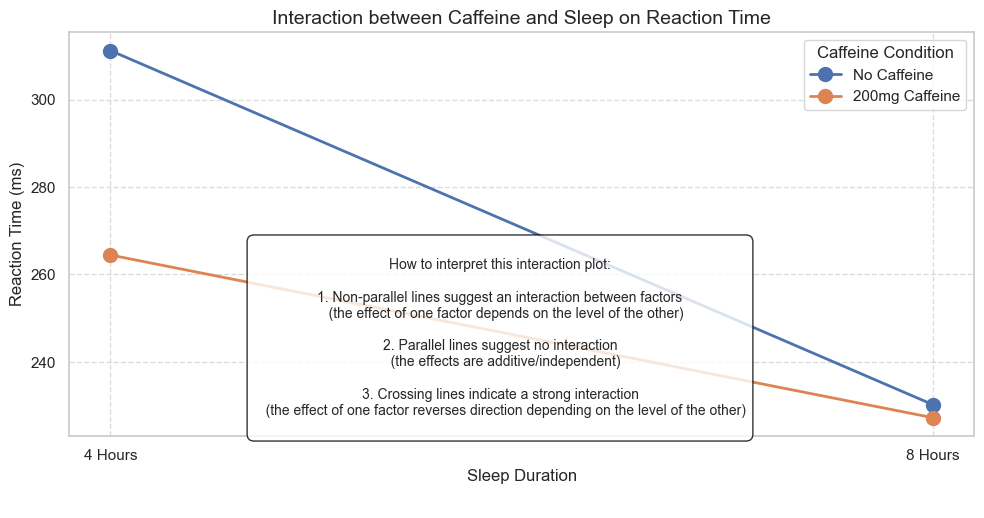

In [6]:
# Create an interaction plot
plt.figure(figsize=(10, 6))

# Plot lines connecting the means
for caffeine in ['No Caffeine', '200mg Caffeine']:
    means = condition_means[condition_means['Caffeine'] == caffeine]
    plt.plot(means['Sleep'], means['ReactionTime'], marker='o', markersize=10, 
             linewidth=2, label=caffeine)

# Add labels and title
plt.xlabel('Sleep Duration', fontsize=12)
plt.ylabel('Reaction Time (ms)', fontsize=12)
plt.title('Interaction between Caffeine and Sleep on Reaction Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Caffeine Condition')

# Add an annotation explaining how to interpret interaction plots
annotation = """
How to interpret this interaction plot:

1. Non-parallel lines suggest an interaction between factors
   (the effect of one factor depends on the level of the other)
   
2. Parallel lines suggest no interaction
   (the effects are additive/independent)
   
3. Crossing lines indicate a strong interaction
   (the effect of one factor reverses direction depending on the level of the other)
"""

plt.annotate(annotation, xy=(0.5, 0.3), xycoords='figure fraction', 
            bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8, edgecolor='black'),
            ha='center', va='center', fontsize=10)

plt.tight_layout(rect=[0, 0.15, 1, 1])  # Adjust layout to make room for annotation
plt.show()

## 4. Introduction to ANOVA

Analysis of Variance (ANOVA) is a statistical method used to analyze differences among group means. When we have a factorial design, we use a special type called a factorial ANOVA.

### The Logic of ANOVA

ANOVA works by comparing two types of variance:

1. **Between-group variance**: How much the group means differ from each other
2. **Within-group variance**: How much individual scores within each group vary (due to individual differences)

The ratio of these variances gives us the F-statistic:

$$F = \frac{\text{Between-group variance}}{\text{Within-group variance}}$$

- If F is large, the group means are more different from each other than would be expected by chance
- If F is small, the differences between group means could be explained by random variation

Let's first visualize how ANOVA partitions variance:

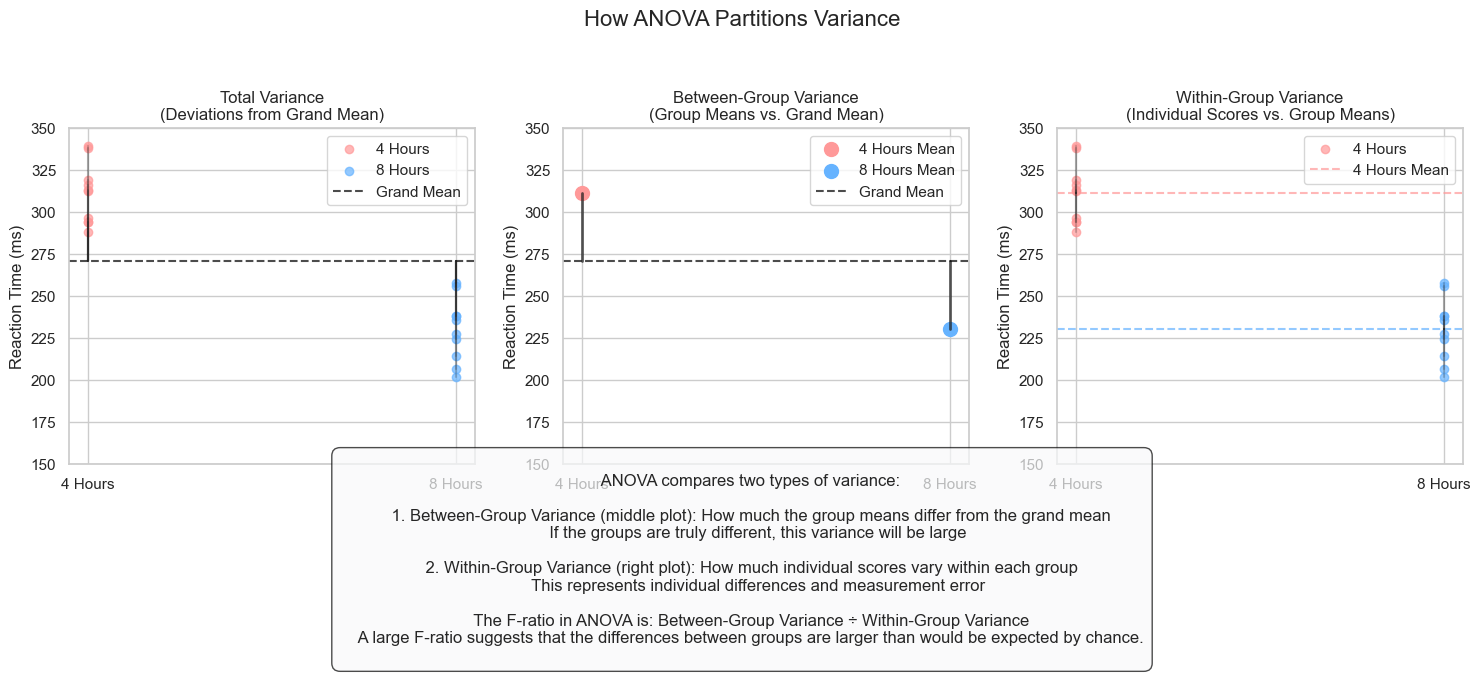

In [7]:
# Function to visualize how ANOVA partitions variance
def visualize_anova_variance():
    # Create a figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Get the data for our visualization
    # We'll use just the No Caffeine condition to keep it simple
    subset = factorial_data[factorial_data['Caffeine'] == 'No Caffeine']
    
    # Calculate the grand mean
    grand_mean = subset['ReactionTime'].mean()
    
    # Calculate group means
    group_means = subset.groupby('Sleep')['ReactionTime'].mean()
    
    # Create colors for the groups
    colors = {'4 Hours': '#ff9999', '8 Hours': '#66b3ff'}
    
    # Plot 1: Total Variance (all data points compared to grand mean)
    ax = axes[0]
    for sleep, group in subset.groupby('Sleep'):
        ax.scatter(np.ones(len(group)) * (0 if sleep == '4 Hours' else 1), 
                   group['ReactionTime'], 
                   color=colors[sleep], 
                   alpha=0.7,
                   label=sleep)
    
    # Add a horizontal line for the grand mean
    ax.axhline(y=grand_mean, color='black', linestyle='--', alpha=0.7, label='Grand Mean')
    
    # Add vertical lines from each point to the grand mean (representing total deviation)
    for sleep, group in subset.groupby('Sleep'):
        x_pos = 0 if sleep == '4 Hours' else 1
        for rt in group['ReactionTime']:
            ax.plot([x_pos, x_pos], [rt, grand_mean], 'k-', alpha=0.2)
    
    ax.set_title('Total Variance\n(Deviations from Grand Mean)', fontsize=12)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['4 Hours', '8 Hours'])
    ax.set_ylabel('Reaction Time (ms)', fontsize=12)
    ax.set_ylim(150, 350)
    ax.legend()
    
    # Plot 2: Between-Group Variance (group means compared to grand mean)
    ax = axes[1]
    
    # Plot group means
    for i, (sleep, mean) in enumerate(group_means.items()):
        ax.scatter([i], [mean], color=colors[sleep], s=100, label=f'{sleep} Mean')
        
        # Add vertical lines from group mean to grand mean
        ax.plot([i, i], [mean, grand_mean], 'k-', linewidth=2, alpha=0.7)
    
    # Add a horizontal line for the grand mean
    ax.axhline(y=grand_mean, color='black', linestyle='--', alpha=0.7, label='Grand Mean')
    
    ax.set_title('Between-Group Variance\n(Group Means vs. Grand Mean)', fontsize=12)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['4 Hours', '8 Hours'])
    ax.set_ylabel('Reaction Time (ms)', fontsize=12)
    ax.set_ylim(150, 350)
    ax.legend()
    
    # Plot 3: Within-Group Variance (individual points compared to their group mean)
    ax = axes[2]
    
    for i, (sleep, group) in enumerate(subset.groupby('Sleep')):
        # Plot data points
        ax.scatter(np.ones(len(group)) * i, group['ReactionTime'], 
                   color=colors[sleep], alpha=0.7, label=sleep if i == 0 else "")
        
        # Add a horizontal line for the group mean
        group_mean = group['ReactionTime'].mean()
        ax.axhline(y=group_mean, color=colors[sleep], linestyle='--', alpha=0.7,
                   label=f'{sleep} Mean' if i == 0 else "")
        
        # Add vertical lines from each point to the group mean
        for rt in group['ReactionTime']:
            ax.plot([i, i], [rt, group_mean], 'k-', alpha=0.2)
    
    ax.set_title('Within-Group Variance\n(Individual Scores vs. Group Means)', fontsize=12)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['4 Hours', '8 Hours'])
    ax.set_ylabel('Reaction Time (ms)', fontsize=12)
    ax.set_ylim(150, 350)
    ax.legend()
    
    # Add a main title
    fig.suptitle('How ANOVA Partitions Variance', fontsize=16, y=1.05)
    
    # Add an explanation
    explanation = """
    ANOVA compares two types of variance:
    
    1. Between-Group Variance (middle plot): How much the group means differ from the grand mean
       If the groups are truly different, this variance will be large
       
    2. Within-Group Variance (right plot): How much individual scores vary within each group
       This represents individual differences and measurement error
       
    The F-ratio in ANOVA is: Between-Group Variance ÷ Within-Group Variance
    A large F-ratio suggests that the differences between groups are larger than would be expected by chance.
    """
    
    plt.figtext(0.5, -0.05, explanation, ha='center', va='center', fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.5", facecolor='#f8f9fa', edgecolor='black', alpha=0.7))
    
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

# Display the ANOVA variance visualization
visualize_anova_variance()

## 5. The Two-Way ANOVA

For our 2×2 factorial design, we need a two-way ANOVA. This allows us to test:

1. **Main effect of Factor A** (Caffeine)
2. **Main effect of Factor B** (Sleep)
3. **Interaction effect between Factors A and B** (Caffeine × Sleep)

Now let's conduct a two-way ANOVA on our simulated data. In Python, we can do this using the `statsmodels` library:

In [8]:
# Perform a two-way ANOVA using statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('ReactionTime ~ C(Caffeine) + C(Sleep) + C(Caffeine):C(Sleep)', data=factorial_data).fit()

# Create an ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print("Two-Way ANOVA Results:\n")
print(anova_table)

# Add a more user-friendly interpretation
print("\nInterpretation:")
print("-" * 50)

# Function to interpret p-values
def interpret_p_value(p_value, effect_name):
    if p_value < 0.001:
        return f"There is a highly significant {effect_name} (p < 0.001)"
    elif p_value < 0.01:
        return f"There is a very significant {effect_name} (p < 0.01)"
    elif p_value < 0.05:
        return f"There is a significant {effect_name} (p < 0.05)"
    else:
        return f"There is no significant {effect_name} (p = {p_value:.3f})"

print(interpret_p_value(anova_table.loc['C(Caffeine)', 'PR(>F)'], "main effect of Caffeine"))
print(interpret_p_value(anova_table.loc['C(Sleep)', 'PR(>F)'], "main effect of Sleep"))
print(interpret_p_value(anova_table.loc['C(Caffeine):C(Sleep)', 'PR(>F)'], "interaction between Caffeine and Sleep"))

# Calculate effect sizes (partial eta-squared)
def partial_eta_squared(anova_table, effect):
    ss_effect = anova_table.loc[effect, 'sum_sq']
    ss_total = anova_table['sum_sq'].sum()
    return ss_effect / ss_total

print("\nEffect Sizes (Partial Eta-Squared):")
print(f"Caffeine: {partial_eta_squared(anova_table, 'C(Caffeine)'):.3f}")
print(f"Sleep: {partial_eta_squared(anova_table, 'C(Sleep)'):.3f}")
print(f"Caffeine × Sleep Interaction: {partial_eta_squared(anova_table, 'C(Caffeine):C(Sleep)'):.3f}")

Two-Way ANOVA Results:

                            sum_sq    df          F        PR(>F)
C(Caffeine)            6183.634044   1.0  12.902527  9.726121e-04
C(Sleep)              34913.067283   1.0  72.848231  3.573964e-10
C(Caffeine):C(Sleep)   4787.651664   1.0   9.989725  3.186861e-03
Residual              17253.272980  36.0        NaN           NaN

Interpretation:
--------------------------------------------------
There is a highly significant main effect of Caffeine (p < 0.001)
There is a highly significant main effect of Sleep (p < 0.001)
There is a very significant interaction between Caffeine and Sleep (p < 0.01)

Effect Sizes (Partial Eta-Squared):
Caffeine: 0.098
Sleep: 0.553
Caffeine × Sleep Interaction: 0.076


## 6. Understanding Main Effects and Interactions

Let's take a deeper look at what main effects and interactions mean in a factorial design:

### Main Effects

A **main effect** is the effect of one independent variable on the dependent variable, averaging across all levels of the other independent variables.

- **Main effect of Caffeine**: The overall effect of caffeine on reaction time, averaging across both sleep conditions
- **Main effect of Sleep**: The overall effect of sleep duration on reaction time, averaging across both caffeine conditions

### Interaction Effects

An **interaction effect** occurs when the effect of one independent variable on the dependent variable depends on the level of another independent variable.

For example, an interaction between caffeine and sleep might mean that caffeine improves reaction time more for sleep-deprived individuals than for well-rested individuals.

Let's calculate and visualize the main effects and interaction:

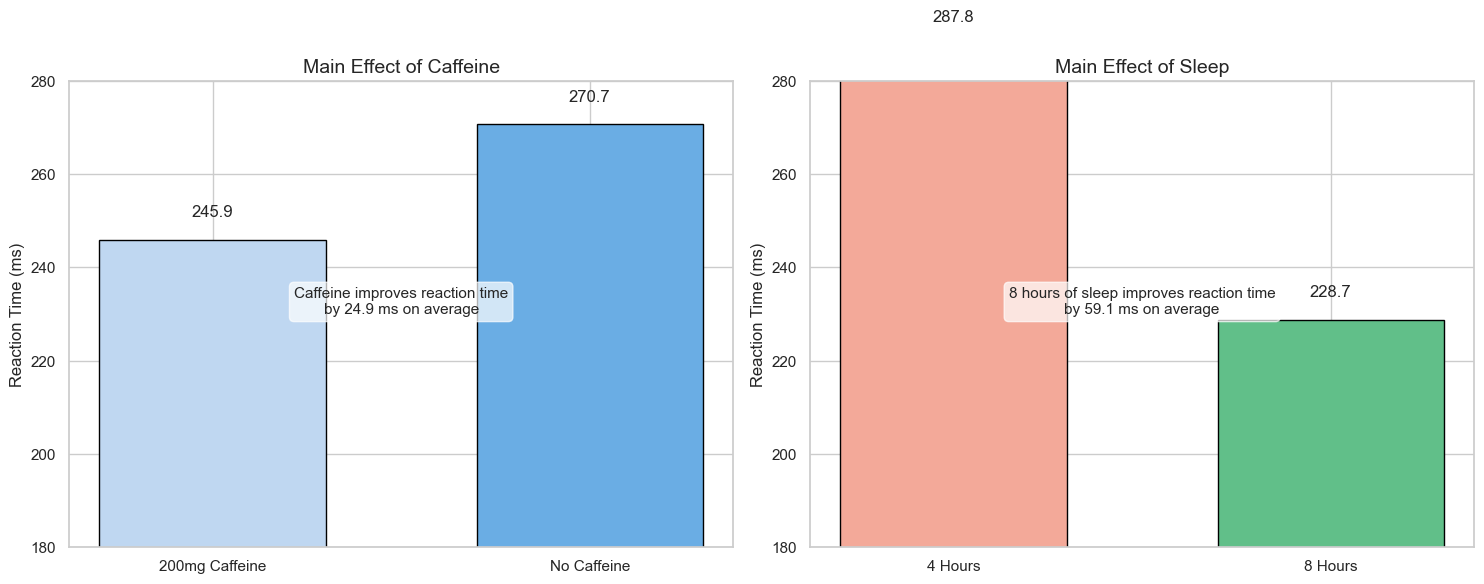

In [9]:
# Calculate marginal means (means for each level of each factor)
caffeine_means = factorial_data.groupby('Caffeine')['ReactionTime'].mean()
sleep_means = factorial_data.groupby('Sleep')['ReactionTime'].mean()

# Create a figure with 2 subplots for the main effects
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the main effect of Caffeine
axes[0].bar(caffeine_means.index, caffeine_means.values, color=['#BFD7F1', '#6AADE4'], 
         edgecolor='black', width=0.6)
axes[0].set_title('Main Effect of Caffeine', fontsize=14)
axes[0].set_ylabel('Reaction Time (ms)', fontsize=12)
axes[0].set_ylim(180, 280)

# Add text labels for the values
for i, value in enumerate(caffeine_means.values):
    axes[0].text(i, value + 5, f"{value:.1f}", ha='center', fontsize=12)

# Add an annotation explaining the main effect
caffeine_diff = caffeine_means['No Caffeine'] - caffeine_means['200mg Caffeine']
axes[0].annotate(f"Caffeine improves reaction time\nby {caffeine_diff:.1f} ms on average", 
                xy=(0.5, 0.5), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7),
                ha='center', fontsize=11)

# Plot the main effect of Sleep
axes[1].bar(sleep_means.index, sleep_means.values, color=['#F3A999', '#61BF89'], 
         edgecolor='black', width=0.6)
axes[1].set_title('Main Effect of Sleep', fontsize=14)
axes[1].set_ylabel('Reaction Time (ms)', fontsize=12)
axes[1].set_ylim(180, 280)

# Add text labels for the values
for i, value in enumerate(sleep_means.values):
    axes[1].text(i, value + 5, f"{value:.1f}", ha='center', fontsize=12)

# Add an annotation explaining the main effect
sleep_diff = sleep_means['4 Hours'] - sleep_means['8 Hours']
axes[1].annotate(f"8 hours of sleep improves reaction time\nby {sleep_diff:.1f} ms on average", 
               xy=(0.5, 0.5), xycoords='axes fraction',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7),
               ha='center', fontsize=11)

plt.tight_layout()
plt.show()

Let's create a comprehensive visualization of the interaction effect:

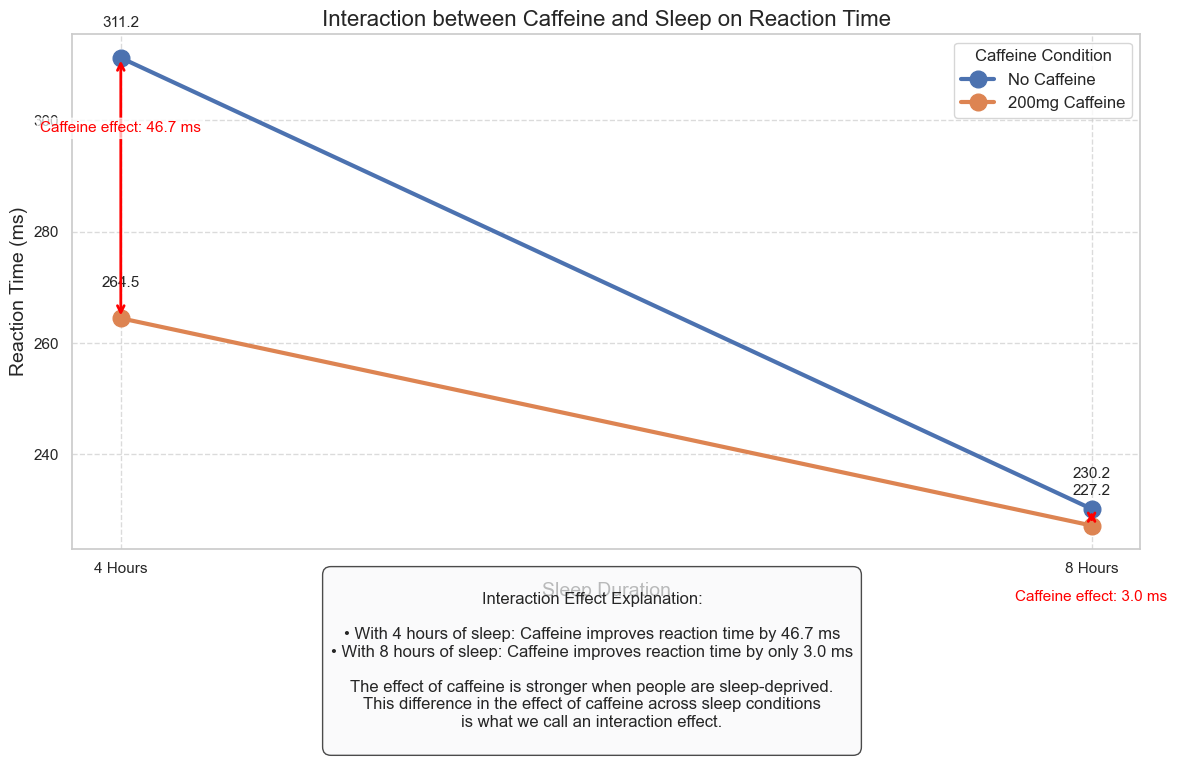

In [10]:
# Create a detailed visualization of the interaction effect
plt.figure(figsize=(12, 8))

# Get the condition means again
condition_means = factorial_data.groupby(['Caffeine', 'Sleep'])['ReactionTime'].mean().reset_index()

# Calculate simple effects (effect of caffeine at each level of sleep)
simple_effects = {}
for sleep in ['4 Hours', '8 Hours']:
    no_caff = condition_means[(condition_means['Caffeine'] == 'No Caffeine') & 
                             (condition_means['Sleep'] == sleep)]['ReactionTime'].values[0]
    with_caff = condition_means[(condition_means['Caffeine'] == '200mg Caffeine') & 
                               (condition_means['Sleep'] == sleep)]['ReactionTime'].values[0]
    simple_effects[sleep] = no_caff - with_caff

# Plot the interaction
for caffeine in ['No Caffeine', '200mg Caffeine']:
    means = condition_means[condition_means['Caffeine'] == caffeine]
    plt.plot(['4 Hours', '8 Hours'], means['ReactionTime'], marker='o', markersize=12, 
             linewidth=3, label=caffeine)

# Add labels and title
plt.xlabel('Sleep Duration', fontsize=14)
plt.ylabel('Reaction Time (ms)', fontsize=14)
plt.title('Interaction between Caffeine and Sleep on Reaction Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Caffeine Condition', fontsize=12, title_fontsize=12)

# Add value labels to each point
for _, row in condition_means.iterrows():
    plt.text(row['Sleep'], row['ReactionTime'] + 5, f"{row['ReactionTime']:.1f}", 
             ha='center', va='bottom', fontsize=11)

# Highlight the simple effects with arrows and text
# Effect of caffeine for 4 Hours sleep
four_hours_no_caff = condition_means[(condition_means['Caffeine'] == 'No Caffeine') & 
                                    (condition_means['Sleep'] == '4 Hours')]['ReactionTime'].values[0]
four_hours_with_caff = condition_means[(condition_means['Caffeine'] == '200mg Caffeine') & 
                                      (condition_means['Sleep'] == '4 Hours')]['ReactionTime'].values[0]
mid_y_4h = (four_hours_no_caff + four_hours_with_caff) / 2

plt.annotate("", xy=('4 Hours', four_hours_with_caff), xytext=('4 Hours', four_hours_no_caff),
            arrowprops=dict(arrowstyle="<->", color='red', lw=2))
plt.text('4 Hours', mid_y_4h + 10, f"Caffeine effect: {simple_effects['4 Hours']:.1f} ms", 
        color='red', ha='center', fontsize=11,
        bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.7))

# Effect of caffeine for 8 Hours sleep
eight_hours_no_caff = condition_means[(condition_means['Caffeine'] == 'No Caffeine') & 
                                     (condition_means['Sleep'] == '8 Hours')]['ReactionTime'].values[0]
eight_hours_with_caff = condition_means[(condition_means['Caffeine'] == '200mg Caffeine') & 
                                       (condition_means['Sleep'] == '8 Hours')]['ReactionTime'].values[0]
mid_y_8h = (eight_hours_no_caff + eight_hours_with_caff) / 2

plt.annotate("", xy=('8 Hours', eight_hours_with_caff), xytext=('8 Hours', eight_hours_no_caff),
            arrowprops=dict(arrowstyle="<->", color='red', lw=2))
plt.text('8 Hours', mid_y_8h - 15, f"Caffeine effect: {simple_effects['8 Hours']:.1f} ms", 
        color='red', ha='center', fontsize=11,
        bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.7))

# Add an explanation of the interaction
interaction_text = f"""
Interaction Effect Explanation:

• With 4 hours of sleep: Caffeine improves reaction time by {simple_effects['4 Hours']:.1f} ms
• With 8 hours of sleep: Caffeine improves reaction time by only {simple_effects['8 Hours']:.1f} ms

The effect of caffeine is stronger when people are sleep-deprived.
This difference in the effect of caffeine across sleep conditions
is what we call an interaction effect.
"""

plt.figtext(0.5, 0.01, interaction_text, ha='center', fontsize=12,
           bbox=dict(boxstyle="round,pad=0.5", facecolor='#f8f9fa', edgecolor='black', alpha=0.7))

plt.tight_layout(rect=[0, 0.15, 1, 0.95])
plt.show()

## 7. Extensions to More Complex Factorial Designs

While we've focused on a 2×2 factorial design, ANOVA can be extended to more complex designs:

- **2×3 factorial design**: 2 levels of Factor A, 3 levels of Factor B (6 conditions total)
- **3×3 factorial design**: 3 levels of Factor A, 3 levels of Factor B (9 conditions total)
- **2×2×2 factorial design**: 3 factors with 2 levels each (8 conditions total)

Let's visualize a 2×3 factorial design where we look at the effect of caffeine (none vs. 200mg) and sleep duration (4, 6, or 8 hours) on reaction time:

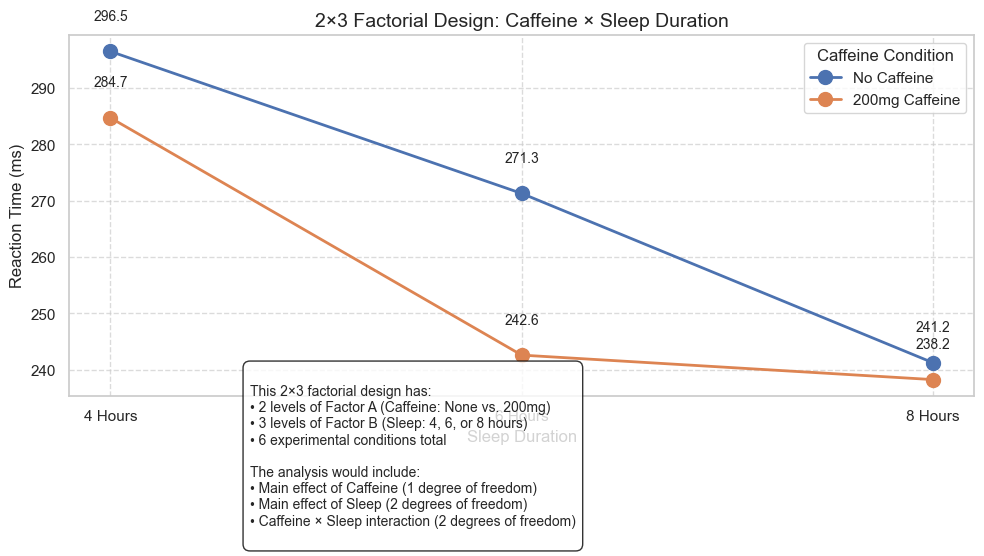

In [11]:
# Function to generate simulated data for a 2×3 factorial experiment
def generate_2x3_factorial_data(n_per_cell=8):
    # Set the parameters for our simulated data
    # Base reaction time (in milliseconds)
    base_rt = 300  
    
    # Effect sizes
    caffeine_effect = -30  # Caffeine reduces reaction time by 30ms
    sleep_effect_6h = -30  # 6 hours of sleep reduces RT by 30ms compared to 4 hours
    sleep_effect_8h = -50  # 8 hours of sleep reduces RT by 50ms compared to 4 hours
    
    # Interaction effects (caffeine has diminishing returns with more sleep)
    interaction_effect_6h = 10  # Less caffeine benefit with 6 hours sleep
    interaction_effect_8h = 15  # Even less caffeine benefit with 8 hours sleep
    
    # Standard deviation (individual differences)
    rt_sd = 25
    
    # Create empty lists to store our data
    data = []
    
    # Generate data for each condition
    for caffeine in ["No Caffeine", "200mg Caffeine"]:
        for sleep in ["4 Hours", "6 Hours", "8 Hours"]:
            # Determine condition effects
            condition_rt = base_rt
            
            # Add caffeine effect
            if caffeine == "200mg Caffeine":
                condition_rt += caffeine_effect
                
            # Add sleep effect
            if sleep == "6 Hours":
                condition_rt += sleep_effect_6h
            elif sleep == "8 Hours":
                condition_rt += sleep_effect_8h
                
            # Add interaction effect if applicable
            if caffeine == "200mg Caffeine":
                if sleep == "6 Hours":
                    condition_rt += interaction_effect_6h
                elif sleep == "8 Hours":
                    condition_rt += interaction_effect_8h
            
            # Generate data for n participants in this condition
            for participant in range(1, n_per_cell + 1):
                # Add some random individual variation
                rt = condition_rt + np.random.normal(0, rt_sd)
                
                # Add to our data
                data.append({
                    "Participant": f"P{participant}_{caffeine[:1]}_{sleep[:1]}",
                    "Caffeine": caffeine,
                    "Sleep": sleep,
                    "ReactionTime": rt
                })
    
    # Create a DataFrame
    df = pd.DataFrame(data)
    
    return df

# Generate our simulated 2×3 data
factorial_data_2x3 = generate_2x3_factorial_data(n_per_cell=8)

# Calculate means for each condition
condition_means_2x3 = factorial_data_2x3.groupby(['Caffeine', 'Sleep'])['ReactionTime'].mean().reset_index()

# Create an interaction plot for the 2×3 design
plt.figure(figsize=(10, 6))

# Plot lines connecting the means
for caffeine in ['No Caffeine', '200mg Caffeine']:
    means = condition_means_2x3[condition_means_2x3['Caffeine'] == caffeine]
    plt.plot(means['Sleep'], means['ReactionTime'], marker='o', markersize=10, 
             linewidth=2, label=caffeine)

# Add labels and title
plt.xlabel('Sleep Duration', fontsize=12)
plt.ylabel('Reaction Time (ms)', fontsize=12)
plt.title('2×3 Factorial Design: Caffeine × Sleep Duration', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Caffeine Condition')

# Add value labels to each point
for _, row in condition_means_2x3.iterrows():
    plt.text(row['Sleep'], row['ReactionTime'] + 5, f"{row['ReactionTime']:.1f}", 
             ha='center', va='bottom', fontsize=10)

# Add an explanation
explanation = """
This 2×3 factorial design has:
• 2 levels of Factor A (Caffeine: None vs. 200mg)
• 3 levels of Factor B (Sleep: 4, 6, or 8 hours)
• 6 experimental conditions total

The analysis would include:
• Main effect of Caffeine (1 degree of freedom)
• Main effect of Sleep (2 degrees of freedom)
• Caffeine × Sleep interaction (2 degrees of freedom)
"""

plt.annotate(explanation, xy=(0.25, 0.02), xycoords='figure fraction', 
            bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8, edgecolor='black'),
            ha='left', va='bottom', fontsize=10)

plt.tight_layout(rect=[0, 0.15, 1, 0.95])
plt.show()

## 8. Post-Hoc Tests and Simple Effects Analysis

After finding significant effects in an ANOVA, researchers often conduct follow-up tests:

1. **Post-hoc tests**: When a factor has more than two levels and shows a significant main effect, post-hoc tests help determine which specific levels differ from each other (e.g., Tukey HSD, Bonferroni)

2. **Simple effects analysis**: When there's a significant interaction, simple effects analysis examines the effect of one factor at each level of the other factor

Let's examine simple effects in our original 2×2 design:

In [12]:
# Perform simple effects analysis
# 1. Effect of caffeine at each level of sleep
print("Simple Effects Analysis: Effect of Caffeine at Each Level of Sleep")
print("-" * 70)

for sleep in ['4 Hours', '8 Hours']:
    # Subset the data for this sleep level
    subset = factorial_data[factorial_data['Sleep'] == sleep]
    
    # Perform t-test comparing No Caffeine vs 200mg Caffeine
    no_caff = subset[subset['Caffeine'] == 'No Caffeine']['ReactionTime']
    with_caff = subset[subset['Caffeine'] == '200mg Caffeine']['ReactionTime']
    
    t_stat, p_value = stats.ttest_ind(no_caff, with_caff)
    
    # Calculate means and mean difference
    no_caff_mean = no_caff.mean()
    with_caff_mean = with_caff.mean()
    mean_diff = no_caff_mean - with_caff_mean
    
    # Calculate Cohen's d effect size
    pooled_sd = np.sqrt(((len(no_caff) - 1) * no_caff.std()**2 + 
                         (len(with_caff) - 1) * with_caff.std()**2) / 
                        (len(no_caff) + len(with_caff) - 2))
    cohens_d = mean_diff / pooled_sd
    
    print(f"Effect of Caffeine with {sleep} of sleep:")
    print(f"  No Caffeine mean: {no_caff_mean:.2f} ms")
    print(f"  200mg Caffeine mean: {with_caff_mean:.2f} ms")
    print(f"  Mean difference: {mean_diff:.2f} ms")
    print(f"  t({len(no_caff) + len(with_caff) - 2}) = {t_stat:.2f}, p = {p_value:.4f}")
    print(f"  Effect size (Cohen's d): {cohens_d:.2f}")
    
    # Interpret the result
    if p_value < 0.05:
        if mean_diff > 0:
            print(f"  Interpretation: With {sleep} of sleep, caffeine significantly improves reaction time.")
        else:
            print(f"  Interpretation: With {sleep} of sleep, caffeine significantly worsens reaction time.")
    else:
        print(f"  Interpretation: With {sleep} of sleep, caffeine does not significantly affect reaction time.")
    
    print()

# 2. Effect of sleep at each level of caffeine
print("\nSimple Effects Analysis: Effect of Sleep at Each Level of Caffeine")
print("-" * 70)

for caffeine in ['No Caffeine', '200mg Caffeine']:
    # Subset the data for this caffeine level
    subset = factorial_data[factorial_data['Caffeine'] == caffeine]
    
    # Perform t-test comparing 4 Hours vs 8 Hours
    sleep_4h = subset[subset['Sleep'] == '4 Hours']['ReactionTime']
    sleep_8h = subset[subset['Sleep'] == '8 Hours']['ReactionTime']
    
    t_stat, p_value = stats.ttest_ind(sleep_4h, sleep_8h)
    
    # Calculate means and mean difference
    sleep_4h_mean = sleep_4h.mean()
    sleep_8h_mean = sleep_8h.mean()
    mean_diff = sleep_4h_mean - sleep_8h_mean
    
    # Calculate Cohen's d effect size
    pooled_sd = np.sqrt(((len(sleep_4h) - 1) * sleep_4h.std()**2 + 
                         (len(sleep_8h) - 1) * sleep_8h.std()**2) / 
                        (len(sleep_4h) + len(sleep_8h) - 2))
    cohens_d = mean_diff / pooled_sd
    
    print(f"Effect of Sleep with {caffeine}:")
    print(f"  4 Hours sleep mean: {sleep_4h_mean:.2f} ms")
    print(f"  8 Hours sleep mean: {sleep_8h_mean:.2f} ms")
    print(f"  Mean difference: {mean_diff:.2f} ms")
    print(f"  t({len(sleep_4h) + len(sleep_8h) - 2}) = {t_stat:.2f}, p = {p_value:.4f}")
    print(f"  Effect size (Cohen's d): {cohens_d:.2f}")
    
    # Interpret the result
    if p_value < 0.05:
        if mean_diff > 0:
            print(f"  Interpretation: With {caffeine}, 8 hours of sleep significantly improves reaction time compared to 4 hours.")
        else:
            print(f"  Interpretation: With {caffeine}, 8 hours of sleep significantly worsens reaction time compared to 4 hours.")
    else:
        print(f"  Interpretation: With {caffeine}, sleep duration does not significantly affect reaction time.")
    
    print()

Simple Effects Analysis: Effect of Caffeine at Each Level of Sleep
----------------------------------------------------------------------
Effect of Caffeine with 4 Hours of sleep:
  No Caffeine mean: 311.20 ms
  200mg Caffeine mean: 264.45 ms
  Mean difference: 46.75 ms
  t(18) = 5.43, p = 0.0000
  Effect size (Cohen's d): 2.43
  Interpretation: With 4 Hours of sleep, caffeine significantly improves reaction time.

Effect of Caffeine with 8 Hours of sleep:
  No Caffeine mean: 230.23 ms
  200mg Caffeine mean: 227.25 ms
  Mean difference: 2.99 ms
  t(18) = 0.28, p = 0.7862
  Effect size (Cohen's d): 0.12
  Interpretation: With 8 Hours of sleep, caffeine does not significantly affect reaction time.


Simple Effects Analysis: Effect of Sleep at Each Level of Caffeine
----------------------------------------------------------------------
Effect of Sleep with No Caffeine:
  4 Hours sleep mean: 311.20 ms
  8 Hours sleep mean: 230.23 ms
  Mean difference: 80.97 ms
  t(18) = 9.80, p = 0.0000
  

## 9. Assumptions of ANOVA

Like all statistical tests, ANOVA has assumptions that should be met for valid results:

1. **Independence**: Observations should be independent of each other
2. **Normality**: The dependent variable should be approximately normally distributed in each group
3. **Homogeneity of variances**: The variances in each group should be approximately equal

Let's check these assumptions for our simulated data:

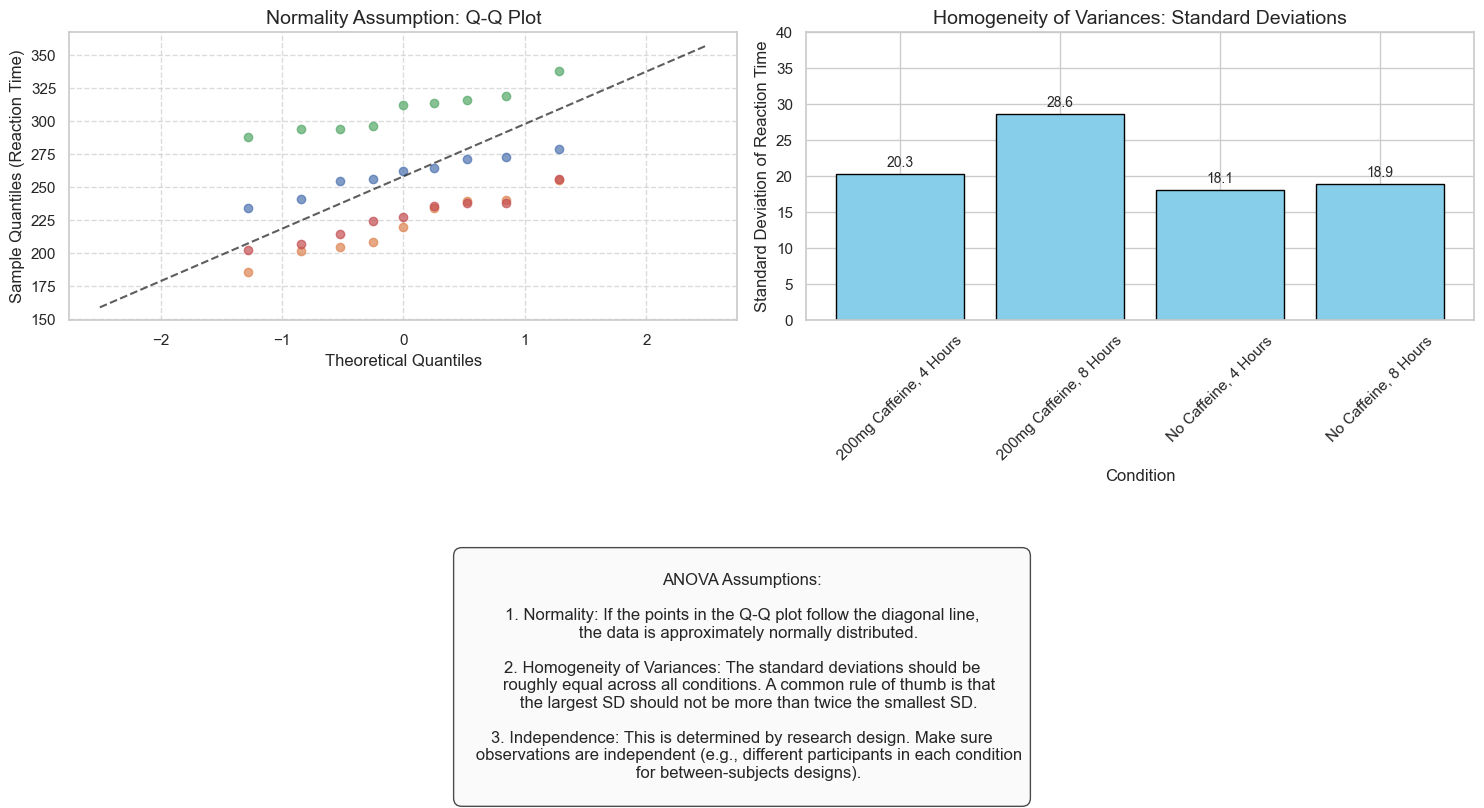

In [13]:
# Check assumptions of ANOVA
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Normality: Create a Q-Q plot for each condition
for i, (name, group) in enumerate(factorial_data.groupby(['Caffeine', 'Sleep'])):
    # Get reaction times for this group
    rt = group['ReactionTime']
    
    # Calculate theoretical quantiles
    quantiles = np.linspace(0, 1, len(rt) + 1)[1:-1]  # Remove 0 and 1
    theoretical_quantiles = stats.norm.ppf(quantiles)
    
    # Sort the data
    sorted_data = np.sort(rt)
    
    # Make sure theoretical_quantiles and sorted_data are the same length
    if len(theoretical_quantiles) != len(sorted_data):
        # Adjust if needed
        min_length = min(len(theoretical_quantiles), len(sorted_data))
        theoretical_quantiles = theoretical_quantiles[:min_length]
        sorted_data = sorted_data[:min_length]
    
    # Create Q-Q plot
    axes[0].scatter(theoretical_quantiles, sorted_data, alpha=0.7, 
                   label=f"{name[0]}, {name[1]}")

# Add reference line
x_range = np.linspace(-2.5, 2.5, 100)
y_range = x_range * np.std(factorial_data['ReactionTime']) + np.mean(factorial_data['ReactionTime'])
axes[0].plot(x_range, y_range, 'k--', alpha=0.7)

# Format the plot
axes[0].set_title('Normality Assumption: Q-Q Plot', fontsize=14)
axes[0].set_xlabel('Theoretical Quantiles', fontsize=12)
axes[0].set_ylabel('Sample Quantiles (Reaction Time)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# 2. Homogeneity of Variances: Compare standard deviations across groups
# Calculate standard deviation for each condition
std_devs = factorial_data.groupby(['Caffeine', 'Sleep'])['ReactionTime'].std().reset_index()
std_devs['Condition'] = std_devs['Caffeine'] + ', ' + std_devs['Sleep']

# Create bar chart of standard deviations
axes[1].bar(std_devs['Condition'], std_devs['ReactionTime'], color='skyblue', edgecolor='black')
axes[1].set_title('Homogeneity of Variances: Standard Deviations', fontsize=14)
axes[1].set_xlabel('Condition', fontsize=12)
axes[1].set_ylabel('Standard Deviation of Reaction Time', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 40)  # Set y-axis limit

# Add value labels
for i, value in enumerate(std_devs['ReactionTime']):
    axes[1].text(i, value + 1, f"{value:.1f}", ha='center', fontsize=10)

# Add annotation explaining the assumptions
annotation = """
ANOVA Assumptions:

1. Normality: If the points in the Q-Q plot follow the diagonal line,
   the data is approximately normally distributed.
   
2. Homogeneity of Variances: The standard deviations should be
   roughly equal across all conditions. A common rule of thumb is that
   the largest SD should not be more than twice the smallest SD.
   
3. Independence: This is determined by research design. Make sure
   observations are independent (e.g., different participants in each condition
   for between-subjects designs).
"""

plt.figtext(0.5, 0.01, annotation, ha='center', va='top', fontsize=12,
           bbox=dict(boxstyle="round,pad=0.5", facecolor='#f8f9fa', edgecolor='black', alpha=0.7))

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

## 10. Reporting ANOVA Results

When reporting ANOVA results in academic papers or presentations, it's important to include all relevant information. Here's an example of how you might report the results of our factorial ANOVA:

In [14]:
# Get the ANOVA results
# (We're just rerunning the ANOVA code from earlier to have the results available)
model = ols('ReactionTime ~ C(Caffeine) + C(Sleep) + C(Caffeine):C(Sleep)', data=factorial_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print("Two-Way ANOVA Results:\n")
print(anova_table)

# Create a formatted APA-style results text
report_text = """
Example APA-Style Write-Up for Results Section:

We conducted a 2 (Caffeine: None vs. 200mg) × 2 (Sleep: 4 Hours vs. 8 Hours) factorial ANOVA on reaction time.

There was a significant main effect of Caffeine, F({:.0f}, {:.0f}) = {:.2f}, p < .001, partial η² = {:.3f}. 
Participants who consumed 200mg of caffeine had faster reaction times (M = {:.2f} ms, SD = {:.2f}) 
than those who did not consume caffeine (M = {:.2f} ms, SD = {:.2f}).

There was also a significant main effect of Sleep, F({:.0f}, {:.0f}) = {:.2f}, p < .001, partial η² = {:.3f}. 
Participants who slept for 8 hours had faster reaction times (M = {:.2f} ms, SD = {:.2f}) 
than those who slept for 4 hours (M = {:.2f} ms, SD = {:.2f}).

Importantly, we found a significant interaction between Caffeine and Sleep, 
F({:.0f}, {:.0f}) = {:.2f}, p = {:.3f}, partial η² = {:.3f}. 
Simple effects analysis revealed that caffeine had a larger effect on reaction time 
when participants were sleep-deprived (4 hours sleep: {:.2f} ms improvement) 
compared to when they were well-rested (8 hours sleep: {:.2f} ms improvement).
""".format(
    # Caffeine main effect
    anova_table.loc['C(Caffeine)', 'df'], 
    anova_table.loc['Residual', 'df'],
    anova_table.loc['C(Caffeine)', 'F'],
    partial_eta_squared(anova_table, 'C(Caffeine)'),
    # Means for caffeine conditions
    factorial_data[factorial_data['Caffeine'] == '200mg Caffeine']['ReactionTime'].mean(),
    factorial_data[factorial_data['Caffeine'] == '200mg Caffeine']['ReactionTime'].std(),
    factorial_data[factorial_data['Caffeine'] == 'No Caffeine']['ReactionTime'].mean(),
    factorial_data[factorial_data['Caffeine'] == 'No Caffeine']['ReactionTime'].std(),
    # Sleep main effect
    anova_table.loc['C(Sleep)', 'df'], 
    anova_table.loc['Residual', 'df'],
    anova_table.loc['C(Sleep)', 'F'],
    partial_eta_squared(anova_table, 'C(Sleep)'),
    # Means for sleep conditions
    factorial_data[factorial_data['Sleep'] == '8 Hours']['ReactionTime'].mean(),
    factorial_data[factorial_data['Sleep'] == '8 Hours']['ReactionTime'].std(),
    factorial_data[factorial_data['Sleep'] == '4 Hours']['ReactionTime'].mean(),
    factorial_data[factorial_data['Sleep'] == '4 Hours']['ReactionTime'].std(),
    # Interaction effect
    anova_table.loc['C(Caffeine):C(Sleep)', 'df'], 
    anova_table.loc['Residual', 'df'],
    anova_table.loc['C(Caffeine):C(Sleep)', 'F'],
    anova_table.loc['C(Caffeine):C(Sleep)', 'PR(>F)'],
    partial_eta_squared(anova_table, 'C(Caffeine):C(Sleep)'),
    # Simple effects values from our previous calculation
    simple_effects['4 Hours'],
    simple_effects['8 Hours']
)

print(report_text)

Two-Way ANOVA Results:

                            sum_sq    df          F        PR(>F)
C(Caffeine)            6183.634044   1.0  12.902527  9.726121e-04
C(Sleep)              34913.067283   1.0  72.848231  3.573964e-10
C(Caffeine):C(Sleep)   4787.651664   1.0   9.989725  3.186861e-03
Residual              17253.272980  36.0        NaN           NaN

Example APA-Style Write-Up for Results Section:

We conducted a 2 (Caffeine: None vs. 200mg) × 2 (Sleep: 4 Hours vs. 8 Hours) factorial ANOVA on reaction time.

There was a significant main effect of Caffeine, F(1, 36) = 12.90, p < .001, partial η² = 0.098. 
Participants who consumed 200mg of caffeine had faster reaction times (M = 245.85 ms, SD = 30.80) 
than those who did not consume caffeine (M = 270.72 ms, SD = 45.26).

There was also a significant main effect of Sleep, F(1, 36) = 72.85, p < .001, partial η² = 0.553. 
Participants who slept for 8 hours had faster reaction times (M = 228.74 ms, SD = 23.65) 
than those who slept for 4 

## 11. ANOVA in Psychological Research

Factorial ANOVA is widely used in psychology research for many types of studies:

1. **Cognitive psychology**: Examining how multiple factors affect reaction time, memory recall, attention, etc.

2. **Clinical psychology**: Investigating how different treatments work across different diagnoses or severity levels

3. **Social psychology**: Studying how social context and individual differences interact to influence behavior

4. **Educational psychology**: Exploring how teaching methods and student characteristics jointly affect learning outcomes

Let's look at some real-world examples:

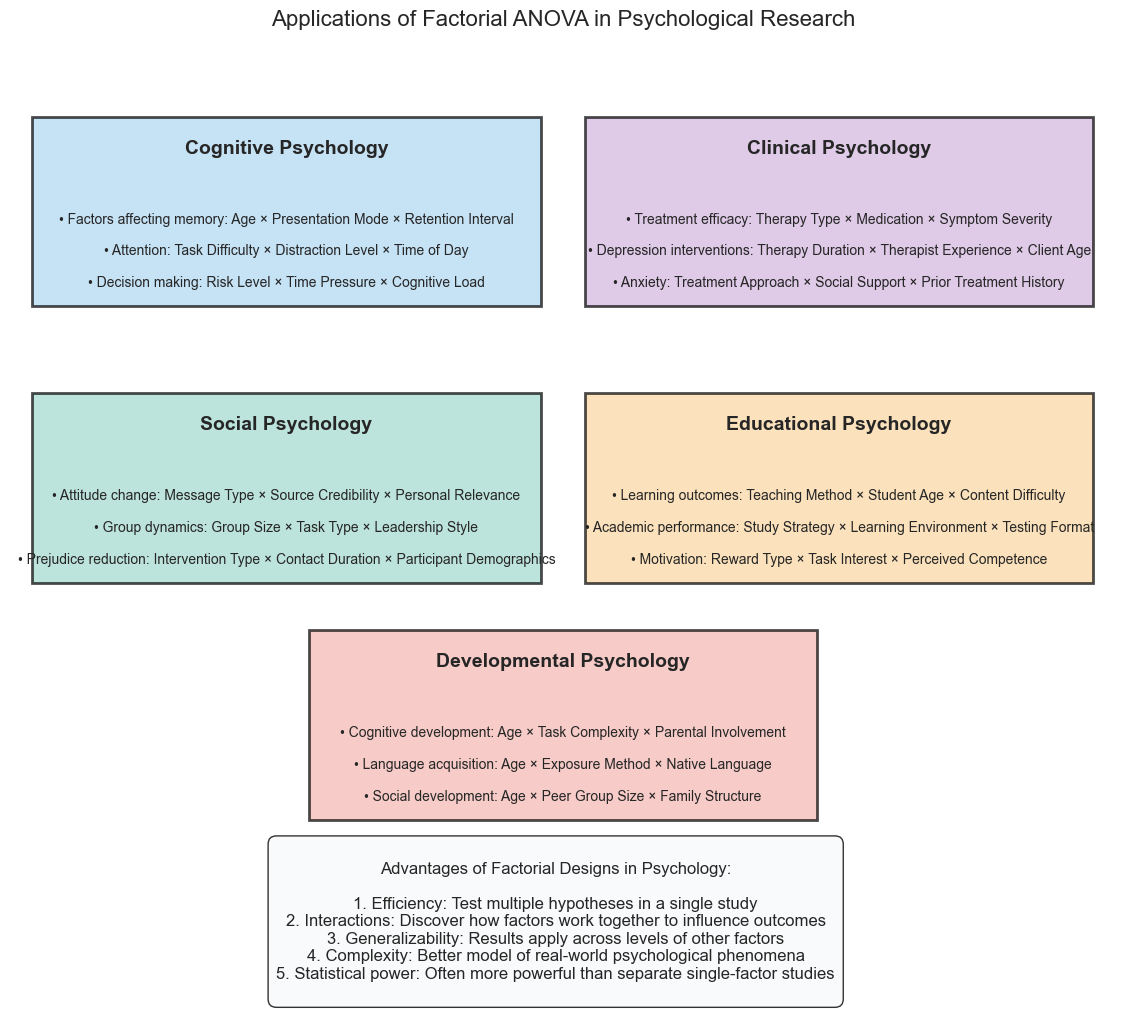

In [15]:
# Create a visual summary of ANOVA applications in psychology
from matplotlib.patches import Rectangle

plt.figure(figsize=(12, 10))

# Remove axes
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Create research domains with examples
domains = [
    {
        'name': 'Cognitive Psychology',
        'color': '#AED6F1',
        'pos': (0.25, 0.8),
        'examples': [
            'Factors affecting memory: Age × Presentation Mode × Retention Interval',
            'Attention: Task Difficulty × Distraction Level × Time of Day',
            'Decision making: Risk Level × Time Pressure × Cognitive Load'
        ]
    },
    {
        'name': 'Clinical Psychology',
        'color': '#D2B4DE',
        'pos': (0.75, 0.8),
        'examples': [
            'Treatment efficacy: Therapy Type × Medication × Symptom Severity',
            'Depression interventions: Therapy Duration × Therapist Experience × Client Age',
            'Anxiety: Treatment Approach × Social Support × Prior Treatment History'
        ]
    },
    {
        'name': 'Social Psychology',
        'color': '#A2D9CE',
        'pos': (0.25, 0.45),
        'examples': [
            'Attitude change: Message Type × Source Credibility × Personal Relevance',
            'Group dynamics: Group Size × Task Type × Leadership Style',
            'Prejudice reduction: Intervention Type × Contact Duration × Participant Demographics'
        ]
    },
    {
        'name': 'Educational Psychology',
        'color': '#FAD7A0',
        'pos': (0.75, 0.45),
        'examples': [
            'Learning outcomes: Teaching Method × Student Age × Content Difficulty',
            'Academic performance: Study Strategy × Learning Environment × Testing Format',
            'Motivation: Reward Type × Task Interest × Perceived Competence'
        ]
    },
    {
        'name': 'Developmental Psychology',
        'color': '#F5B7B1',
        'pos': (0.5, 0.15),
        'examples': [
            'Cognitive development: Age × Task Complexity × Parental Involvement',
            'Language acquisition: Age × Exposure Method × Native Language',
            'Social development: Age × Peer Group Size × Family Structure'
        ]
    }
]

# Plot the domains and examples
for domain in domains:
    # Create a rectangle for the domain
    rect = Rectangle((domain['pos'][0]-0.23, domain['pos'][1]-0.12), 0.46, 0.24, 
                     facecolor=domain['color'], edgecolor='black', alpha=0.7,
                     linewidth=2, zorder=1)
    ax.add_patch(rect)
    
    # Add the domain name
    ax.text(domain['pos'][0], domain['pos'][1]+0.08, domain['name'], 
            ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Add examples
    for i, example in enumerate(domain['examples']):
        ax.text(domain['pos'][0], domain['pos'][1]-0.01-(i*0.04), f"• {example}", 
                ha='center', va='center', fontsize=10, wrap=True)

# Add title
plt.title('Applications of Factorial ANOVA in Psychological Research', fontsize=16, pad=20)

# Add note about factorial design advantages
advantages = """
Advantages of Factorial Designs in Psychology:

1. Efficiency: Test multiple hypotheses in a single study
2. Interactions: Discover how factors work together to influence outcomes
3. Generalizability: Results apply across levels of other factors
4. Complexity: Better model of real-world psychological phenomena
5. Statistical power: Often more powerful than separate single-factor studies
"""

plt.figtext(0.5, 0.02, advantages, ha='center', va='center', fontsize=12,
           bbox=dict(boxstyle="round,pad=0.5", facecolor='#f8f9fa', edgecolor='black', alpha=0.8))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

## Summary

In this chapter, we've explored factorial designs and ANOVA, powerful tools for psychological research. Here's what we've covered:

1. **Factorial designs** allow us to examine multiple independent variables simultaneously and study their interactions

2. **Two-way ANOVA** tests for main effects of two factors and their interaction

3. **Main effects** tell us the overall effect of each factor, averaging across levels of the other factor

4. **Interaction effects** tell us when the effect of one factor depends on the level of another factor

5. **ANOVA partitions variance** into between-group and within-group components, comparing them with the F-statistic

6. **Post-hoc tests and simple effects analysis** help us interpret significant ANOVA results

7. **ANOVA assumptions** include independence, normality, and homogeneity of variances

8. **Reporting ANOVA results** requires specific statistical information in a standardized format

9. **Applications in psychology** span cognitive, clinical, social, educational, and developmental domains

Factorial designs and ANOVA are essential tools for psychologists seeking to understand complex psychological phenomena influenced by multiple factors.

## Practice Exercises

1. **Design a Study**: Create a 2×2 factorial design to investigate a psychological question of your choice. Identify the factors, levels, dependent variable, and hypothesized pattern of results.

2. **Interpret Interactions**: For each of the following interaction patterns, explain what they mean in simple terms:
   - Crossing lines in an interaction plot
   - Non-parallel but non-crossing lines
   - Parallel lines

3. **ANOVA Table**: Given the following ANOVA table, interpret the results:
   - Factor A: F(1, 36) = 15.3, p < 0.001
   - Factor B: F(1, 36) = 8.7, p = 0.005
   - A × B Interaction: F(1, 36) = 0.8, p = 0.38

4. **Data Analysis**: Modify the simulation code to create a 2×2 factorial design with:
   - No main effect of Factor A
   - A strong main effect of Factor B
   - A significant interaction
   Then run the ANOVA and interpret the results.

5. **Application**: Find a published psychology study that used factorial ANOVA. Summarize the design, factors, and key findings.

6. **Advanced**: Extend the code to create and analyze a 2×2×2 factorial design with three independent variables.